#### <CENTER> PROJECT - HAND GESTURE REGOGNITION (AMERICAN SIGN LANGUAGE) USING CONVOLUTIONAL NEURAL NETWORKS (CNN)<CENTER>

#### Importing Libraries

In [1]:
import os
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import cv2

#### Data Preprocessing

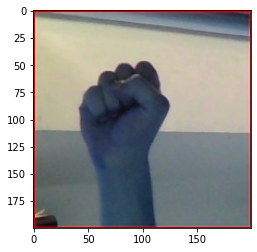

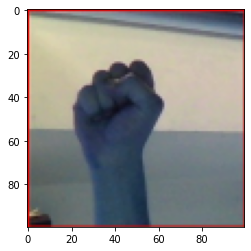

In [54]:
temp_img = cv2.imread("Sign_reduced//Sign_lang//asl_alphabet_train//a_g//S//S1.jpg")
plt.imshow(temp_img)
plt.show()
plt.figure()
red = cv2.resize(temp_img, (100,100))
plt.imshow(red)
plt.show()

In [6]:
def load_data(train_dir):
    images = []
    labels = []
    index = -1
    for folder in os.listdir(train_dir):
        index +=1
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            resized = cv2.resize(temp_img, (100,100))
            temp_img = np.array(resized)
            images.append(temp_img)
            labels.append(index)
    labels = tf.keras.utils.to_categorical(labels)
    
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    
    return x_train, x_test, y_train, y_test

train_dir = "Sign_reduced//Sign_lang//asl_alphabet_train//a_g"
x_train, x_test, y_train, y_test = load_data(train_dir)

In [7]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [8]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(78035, 100, 100, 3) (8671, 100, 100, 3) (78035, 29) (8671, 29)


#### Building and Executing the CNN Model

In [78]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (4,4), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.Conv2D(32, (4,4), strides = 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (4,4), strides = 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (4,4), strides = 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (4,4), strides = 1, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(29, activation='softmax')
])


In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 97, 97, 16)        784       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 94, 94, 32)        8224      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 44, 44, 64)        32832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 19, 19, 128)       131200    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 9, 9, 128)        

In [42]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
history = model.fit(
      x_train,y_train,
      epochs=5,
      validation_data = (x_test,y_test))

Epoch 1/5
2439/2439 [==============================] - 1394s 572ms/step - loss: 1.0694 - accuracy: 0.6929 - val_loss: 0.2092 - val_accuracy: 0.9345
Epoch 2/5
2439/2439 [==============================] - 1349s 553ms/step - loss: 0.1460 - accuracy: 0.9562 - val_loss: 0.0684 - val_accuracy: 0.9791
Epoch 3/5
2439/2439 [==============================] - 1306s 535ms/step - loss: 0.0839 - accuracy: 0.9761 - val_loss: 0.0705 - val_accuracy: 0.9788
Epoch 4/5
2439/2439 [==============================] - 1318s 540ms/step - loss: 0.0784 - accuracy: 0.9792 - val_loss: 0.0413 - val_accuracy: 0.9867
Epoch 5/5
2439/2439 [==============================] - 1382s 567ms/step - loss: 0.0605 - accuracy: 0.9840 - val_loss: 0.0852 - val_accuracy: 0.9791


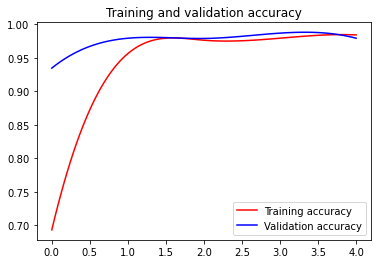

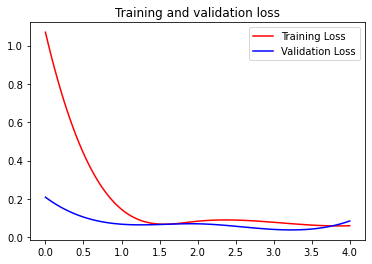

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
x_new = np.linspace(0, 4, 100)
a_BSpline = interpolate.make_interp_spline(epochs,acc)
y_new = a_BSpline(x_new)

plt.plot(x_new,y_new,'r', label='Training accuracy' )
#plt.plot(epochs, acc, 'r', label='Training accuracy')

a_BSpline2 = interpolate.make_interp_spline(epochs,val_acc)
y_new2 = a_BSpline2(x_new)
plt.plot(x_new,y_new2,'b', label='Validation accuracy' )
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


a_BSpline3 = interpolate.make_interp_spline(epochs,loss)
y_new3 = a_BSpline3(x_new)
plt.plot(x_new,y_new3,'r', label='Training Loss' )
#plt.plot(epochs, loss, 'r', label='Training Loss')

a_BSpline4 = interpolate.make_interp_spline(epochs,val_loss)
y_new4 = a_BSpline4(x_new)
plt.plot(x_new,y_new4,'b', label='Validation Loss' )
#plt.plot(epochs, val_loss, 'b', label='Validation Loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

In [45]:
model.save_weights('new_weights .h5')